# K-평균 군집화

- n_clusters: 군집의 갯수

- init: 초기화 방법. "random"이면 무작위, "k-means++"이면 K-평균++ 방법. 또는 각 데이터의 군집 라벨.

- n_init: 초기 중심위치 시도 횟수. 디폴트는 10이고 10개의 무작위 중심위치 목록 중 가장 좋은 값을 선택한다.

- max_iter: 최대 반복 횟수.

- random_state: 시드값.

In [2]:
warnings.simplefilter('ignore')
plt.rcParams['font.family'] = 'NanumGothic'

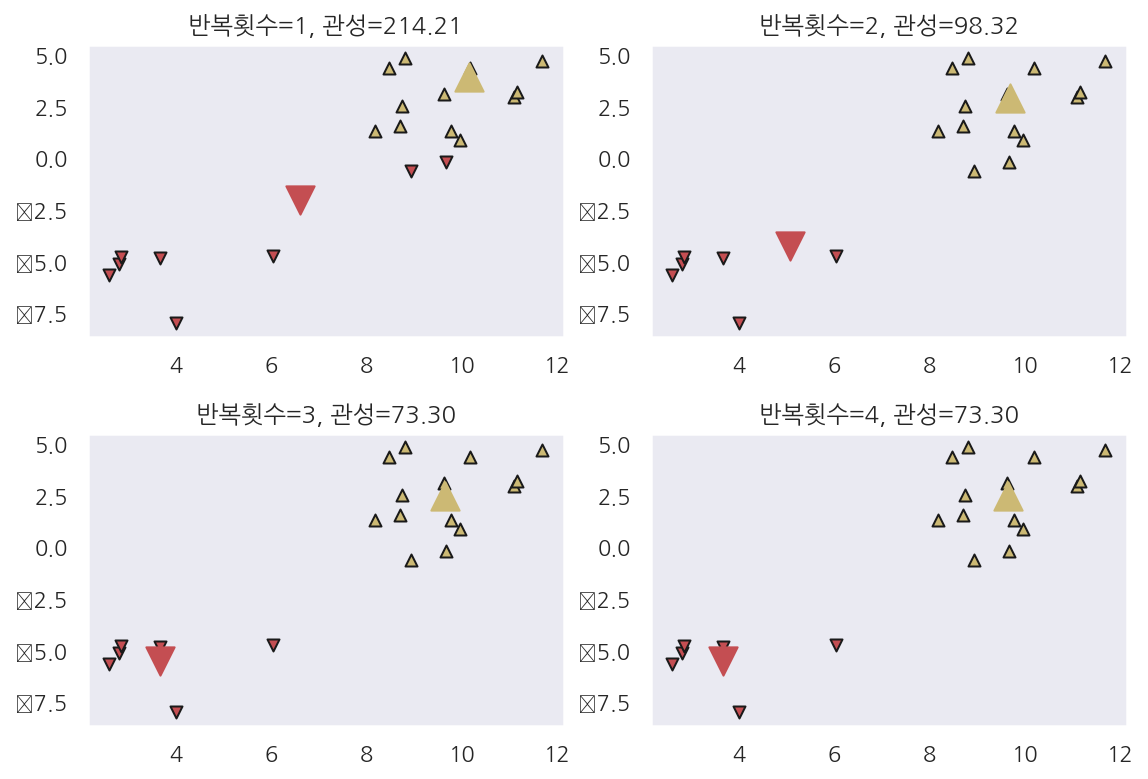

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("반복횟수={}, 관성={:5.2f}".format(n, -model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

## K-평균 ++

1. 중심위치를 저장할 집합 M 준비

2. 일단 하나의 중심위치 μ0를 랜덤하게 선택하여 M에 넣는다.

3. M에 속하지 않는 모든 표본 xi에 대해 거리 d(M,xi)를 계산. d(M,xi)는 M안의 모든 샘플 μk에 대해 d(μk,xi)를 계산하여 가장 작은 값 선택

4. d(M,xi)에 비례한 확률로 다음 중심위치 μ를 선택.

5. K개의 중심위치를 선택할 때까지 반복

6. K-평균 방법 사용

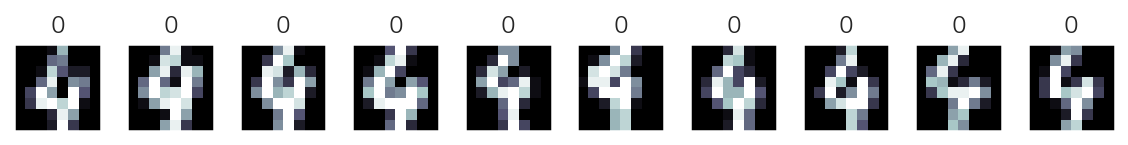

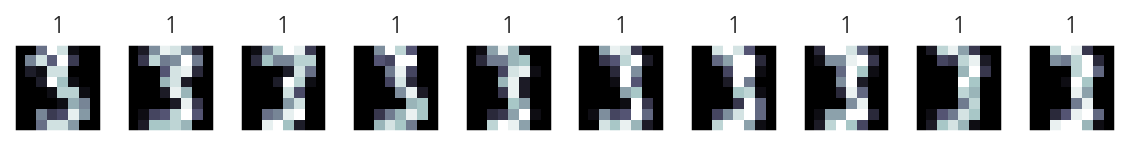

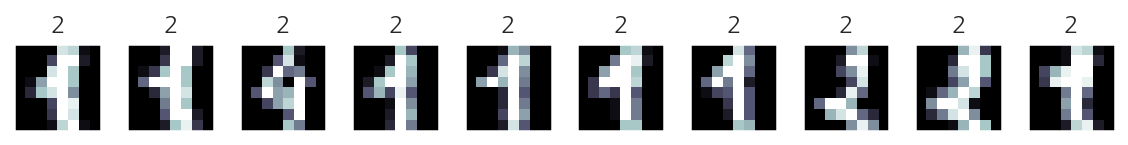

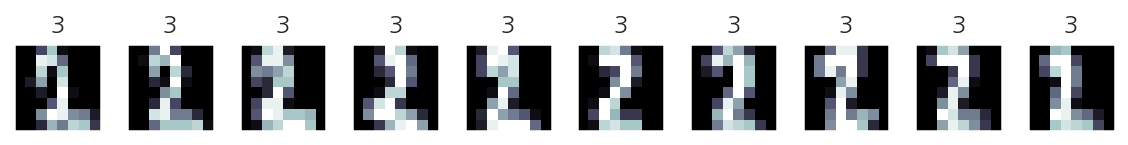

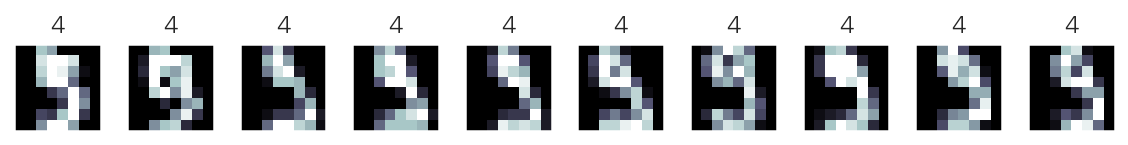

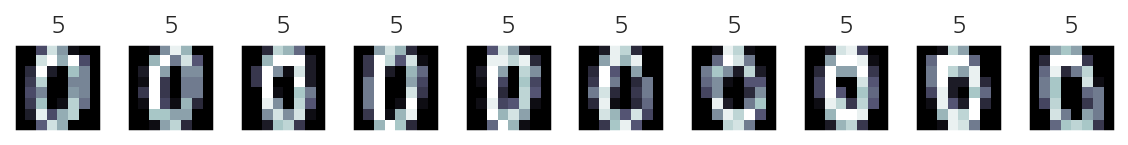

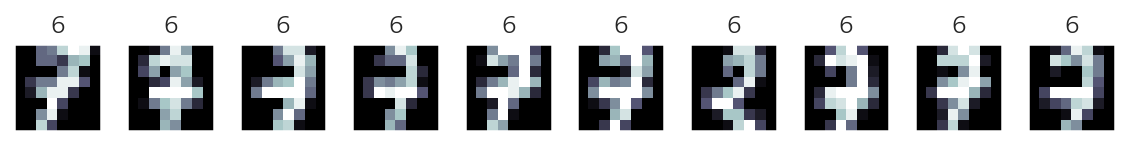

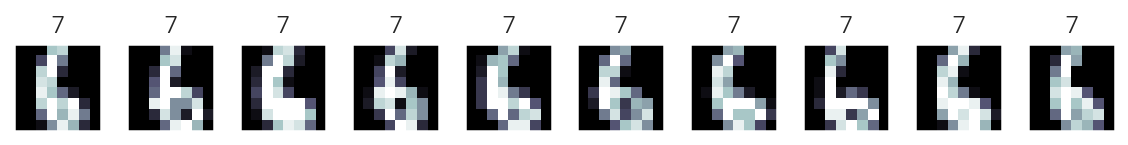

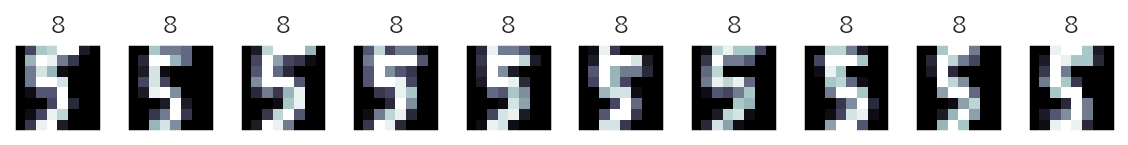

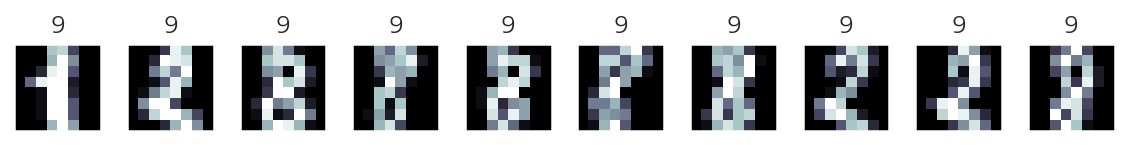

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    

for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,  55,  24,   0,   0,   0,   2,   1,  99],
       [  0,  13,   2, 148,   2,   1,   3,   0,   0,   8],
       [  0, 155,   0,   1,  11,   0,   7,   0,   2,   7],
       [163,   0,   7,   0,   0,   0,   7,   0,   0,   4],
       [  2,   1,   0,   0,  42,   0,   0,   1, 136,   0],
       [  0,   0,   1,   0,   0,   1,   0, 177,   0,   2],
       [  0,   0,   0,   0,   0,   0, 177,   0,   0,   2],
       [  0,   4,   6,   3,  48,   0,   5,   2,   4, 102],
       [  0,   6,  20,   0, 139,   0,   7,   0,   6,   2]], dtype=int64)

In [6]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

ARI: 0.6703800183468681
AMI: 0.7417664506416767
Silhouette Score: 0.18249069204151275


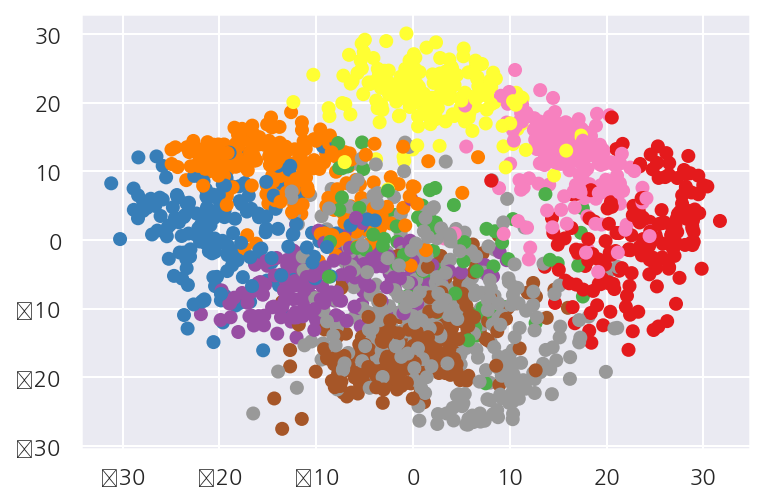

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

## 연습문제

In [8]:
pca = PCA(n_components=10)
X = pca.fit_transform(digits.data)

In [10]:
from sklearn.cluster import KMeans
km = KMeans(init='k-means++', n_clusters=10, random_state=1)
km.fit(X)
y_pred = km.labels_

In [13]:
print(km.cluster_centers_.shape)
km.cluster_centers_

(10, 10)


array([[ -0.47224158, -15.56942975, -12.01203882,   7.86381499,
         -6.78674178,   8.03933872,  -1.23309491,   0.81356606,
          0.49298032,  -0.20634668],
       [ 23.0867919 ,   0.39210468,  -8.33086194,  -2.80447075,
          0.88168342,  -0.17077976,   3.67827177,   7.58810919,
         -0.04427296,  -1.01748465],
       [-19.33209427,   0.95924155,  -0.67656857,  -6.69405514,
         -0.23910394,   1.42237518,   1.00245953,   4.08439305,
         -7.57610812,  -0.36650799],
       [  1.90083385,  -3.19934624, -18.02894126, -17.51962762,
          6.6385163 ,  -2.40031061,   0.83796505,  -5.45667277,
          2.74125948,   3.7038299 ],
       [ -0.87971152,  -5.10330761,  -0.44893721,  14.02752047,
         14.6397958 ,  -2.15680597,  -1.31202786,  -1.22128585,
         -1.96125451,   1.88670662],
       [ -8.7878488 ,  -6.39156411,  19.18739778,  -0.12510169,
         -1.35302271,  -1.10001451,   8.50834668,   0.23372353,
          1.32419317,   0.41192367],
       [ 1

In [32]:
adjusted_rand_score(digits.target, km.labels_)

0.6419631255788764

In [15]:
adjusted_mutual_info_score(digits.target, km.labels_)

0.7167260542888184

In [16]:
silhouette_score(X, km.labels_)

0.26308679707651694

# 미니배치 K-평균 군집화

In [17]:
from sklearn.cluster import MiniBatchKMeans

In [24]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150000, n_features=2, cluster_std = [1.0, 2.5, 0.5], random_state=170)

In [25]:
X.shape

(150000, 2)

In [26]:
%%time

model1 = KMeans(n_clusters=3).fit(X)

Wall time: 779 ms


In [27]:
%%time

model2 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)

Wall time: 150 ms


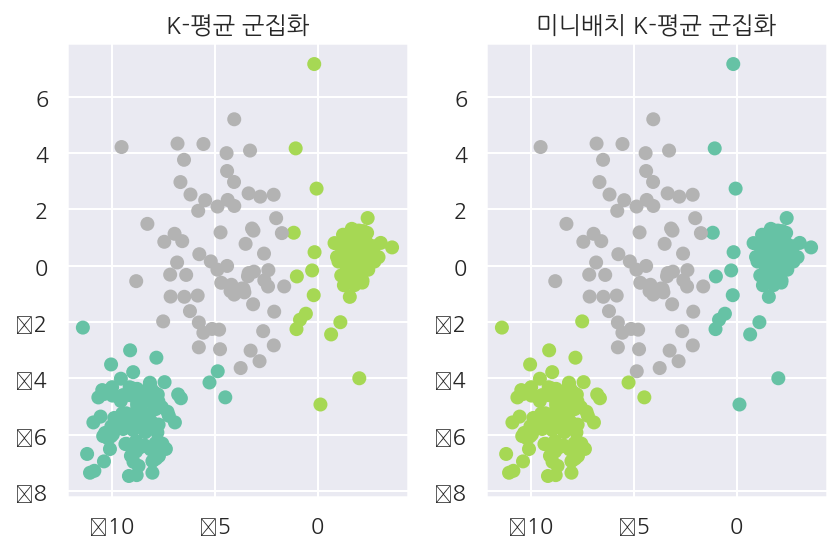

In [31]:
idx = np.random.randint(15000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx,1], c=model1.labels_[idx], cmap=plt.cm.Set2)
plt.title("K-평균 군집화")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx,1], c=model2.labels_[idx], cmap=plt.cm.Set2)
plt.title("미니배치 K-평균 군집화")
plt.tight_layout()
plt.show()